In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
from xgboost.sklearn import XGBClassifier

In [6]:
df=pd.read_csv("/content/drive/MyDrive/uci-secom.csv")
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [7]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
df.shape

(1567, 592)

In [9]:
df.isna().any()

Time         False
0             True
1             True
2             True
3             True
             ...  
586           True
587           True
588           True
589           True
Pass/Fail    False
Length: 592, dtype: bool

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [12]:
df = df.bfill()   #is any nullvalue we did this method

In [13]:
df = df.ffill()

In [14]:
df.isna().any()

Time         False
0            False
1            False
2            False
3            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 592, dtype: bool

In [15]:
print(df.shape)

(1567, 592)


In [16]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [17]:
df1 = df.drop(['Time'], axis = 1)



In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
labelfit = le.fit(df1[['Pass/Fail']])
df1['Pass/Fail']=labelfit.transform(df1[['Pass/Fail']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df1

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,208.2045,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,44.0077,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,43.5231,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4622,-0.0072,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,0


In [21]:
x=df1.iloc[:,:-1]                                                          #x = data.iloc[:,:306]
                                                    #y=data[:,"pass/fail"] #this will be the split in after multicollinearity remove

y=df1.iloc[:,-1]            #x = data.iloc[:, :-1]      #row,coloumns
                        #y = data.iloc[:, -1]

In [22]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0060,208.2045,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0052,44.0077,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [23]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Pass/Fail, dtype: int64

In [33]:
# function to get unique values
def unique(df):
 
     #initialize a null list
    unique_df = []
     
     #traverse for all elements
    for k in df:
        # check if exists in unique_df or not
        if k not in unique_df:
            unique_df.append(k)
    # print list
    for k in unique_df:
        print(k)                                   #this is not good for this pro almost unique value is used for in any similarity in any x coloumn
        # driver code
unique_df = []
print("the unique values from unique_df is")
unique(unique_df)

the unique values from unique_df is


In [25]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape) #here we normally splitting them into train test and split, before we comment some code 
# is used to multi collinearity purposes, this will be run  here too much diffrent we can see it that code executed after
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 590)
shape of x_test:  (471, 590)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier_rf = RandomForestClassifier(random_state=42, max_depth=5,n_estimators=100, oob_score=True)
                                       

In [28]:

classifier_rf.fit(x_train, y_train)    #x small alphabet

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

print

<function print>

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score        


lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.881104033970276


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


NameError: ignored

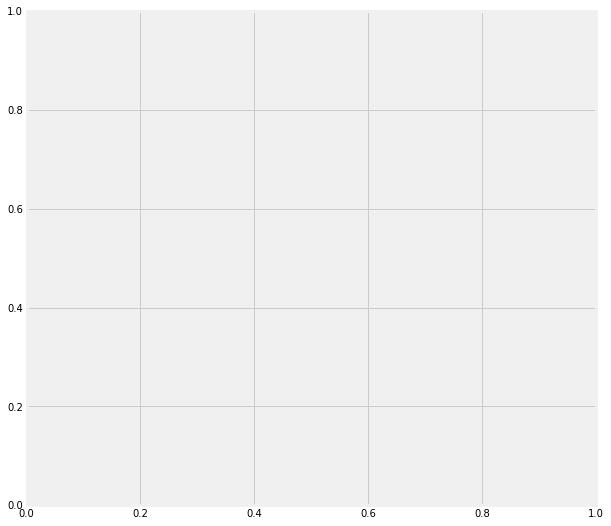

In [ ]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)               #first we take the head() and taken 4 sensor measurements 0 index to 4th total number5
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

                                       #sns.add_legend()
                                        #plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))        #i clear my doubt here

In [ ]:
plt.subplot(2, 2,1)     #2row ,2coloumn,    plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot.

In [ ]:
sns.distplot(target['1'], hist=True, rug=True)     #    target in distplot is so confused


In [ ]:
# Sort the dataframe by target

In [ ]:
target_1 = df.loc[df['target'] == 1]
target_2 = df.loc[df['target'] == 2]
target_3 = df.loc[df['target'] == 3]
target_4=  df.loc[df['target'] == 4]


In [ ]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

In [ ]:
#labels = ['Pass', 'Fail']
#size = df["pass/Fail"].value_counts()    #we use undersampling .  we can randomly delete 
#colors = ['blue', 'green']                # rows from the majority class to match them with the minority class which is called undersampling
#explode = [0, 0.1]

#plt.style.use('seaborn-deep')
#plt.rcParams['figure.figsize'] = (8, 8)
#plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
#plt.axis('off')
#plt.title('Target: Pass or Fail', fontsize = 20)
#plt.legend()
#plt.show()
#df['Pass/Fail'].value_counts().plot(kind="bar");

In [ ]:
# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
plt.axis("off")
 
# plotting data on chart
plt.pie(df, labels='Pass/Fail', colors= colors, explode=explode, autopct='%.2f%%')           
        
  
# displaying chart                                       #'%.0f%%'
plt.show()

In [ ]:
#Failure of Classification Accuracy for Imbalanced Class Distributions

In [ ]:
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)   # YlGnBu
sns.heatmap(df.corr(), cmap = "Accent_r")
plt.title('Correlation heatmap for the Df', fontsize = 20)

In [ ]:
#remove multicollinearity in data


In [ ]:
#Remove the highly collinear features from data
##def remove_collinear_features(x, threshold): #variance inflation factor(VIF)
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

In [ ]:

    # Calculate the correlation matrix
    #corr_matrix = x.corr()
    #iters = range(len(corr_matrix.columns) - 1)
    #drop_cols = []

In [ ]:

    # Iterate through the correlation matrix and compare correlations
    #for i in iters:
        #for j in range(i+1):
            #item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            #col = item.columns                                       #now i didn't use this code here the only thing !pip install  collinearity   package not installed
            #row = item.index                                         #here we can do  drop the high correlated same features 
            #val = abs(item.values)                                    #this method is used to find multicollinearity in data

            # If correlation exceeds the threshold
            #if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                #drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    #drops = set(drop_cols)
    #x = x.drop(columns=drops)

    #return x

In [ ]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
#data = remove_collinear_features(data,0.70)

In [ ]:
# deleting the first column

#df = df.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
#df.shape

In [ ]:
#df.head( ) #this method will be used and after remove multicollinearity in data and find data head

In [ ]:

# separating the dependent and independent data

#x = data.iloc[:,:306]
#y = data["Pass/Fail"]
#this code will be executed and split on a index value as feature "x", and output as "y"
# getting the shapes of new data sets x and y
#print("shape of x:", x.shape)   #allready we did split x and y value before training and testing
#print("shape of y:", y.shape)
#shape of x: (1567, 306)
#shape of y: (1567,)  #this code snippet executed after the multicollinearity removes from dataset

Standardization of data Machine Learning
Summary: Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values. In sklearn

In [ ]:
# standardization

#from sklearn.preprocessing import StandardScaler

# creating a standard scaler
#sc = StandardScaler()           

# fitting independent data to the model          #this code is related with multi collinearity
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)